In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Anything for Money,1967
1,El factor Pilgrim,2000
2,Unleashed,1997
3,Mia mana katigoreitai,1972
4,Beer for My Horses,2008


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
c = cast
t = titles

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

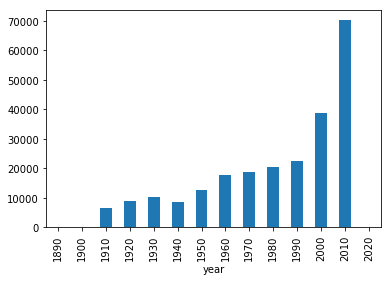

In [7]:
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

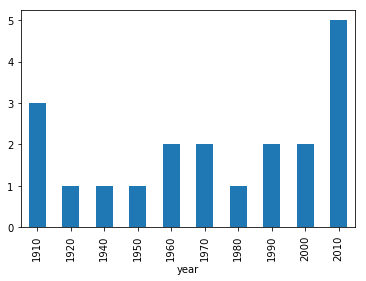

In [8]:
movie = t[t.title == "Hamlet"]
movie.groupby(movie.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [9]:
year = c[c.year // 10 == 195]
search = year[year.n == 1]
search.groupby(['year', 'type']).size()

year  type   
1950  actor      626
      actress    280
1951  actor      650
      actress    284
1952  actor      610
      actress    294
1953  actor      651
      actress    302
1954  actor      638
      actress    309
1955  actor      645
      actress    285
1956  actor      647
      actress    304
1957  actor      734
      actress    307
1958  actor      711
      actress    295
1959  actor      722
      actress    318
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [10]:
year = c[c.year // 10 *10 == 1950]
search = year[year.n < 6]
search.groupby(['n', 'type']).size()

n    type   
1.0  actor      6634
     actress    2978
2.0  actor      4584
     actress    4572
3.0  actor      5607
     actress    3159
4.0  actor      5610
     actress    2859
5.0  actor      5630
     actress    2553
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [11]:
c = cast
movie = c[c.title == 'The Pink Panther']
search = movie.sort_values(by = 'n').groupby(['year'])[['n']].max()
search

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [13]:
actor = c[c.name == "Frank Oz"]
search = actor.groupby(['year', 'title']).size()
search[search>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [15]:
actor = c[c.name == "Frank Oz"]
search = actor.groupby(['character']).size()
search[search>1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    4
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64